# Palmer Penguins

This notebook contains my analysis of the famous palmer penguins dataset.

## Loading the Dataset

The pandas library in Python has been used for this analysis as it is efficient, powerful, and flexible for analyzing tabular data with ease, leveraging Python's ecosystem (nvidia).

In [96]:
# Data frames
import pandas as pd

# Import matplotlib
import matplotlib.pyplot as plt 

# Import numpy
import numpy as np

# Import scipy
from scipy.stats import norm

The penguin csv file used for this analysis was from the [Seaborn](https://github.com/mwaskom/seaborn/blob/master/README.md)'s repository as recommended on the Assessment Instructions for the module of Principles of Data Analytics (in text citation here).

In [33]:
# Load the penguins data set (read_csv_using).
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')

## Exploring the Dataset

The structure of the penguins dataset can be understood by looking into it.

In [34]:
# Look into the data structure
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


The following assumptions can be made by looking into the structure of this dataset:
<ol>
<li>There are 7 columns with 7 variables.</li>
<li>This dataset is composed by 344 rows.</li>
<li>Some rows of the dataset have NaN.</li> 
</ol>

## Review Dataset Information

To choose the right statistical tests to analyse the dataset, the data types have to be identified for each column of the dataset as well as the count of non-null data (Pandas Python Explore Dataset, Data Variable Types). 

In [35]:
# Display dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


## Types of Variables to Model the Data Set

In the info provided above is shown that 4 of the 7 columns have a data type of float with 64 bits and the other 3 have a datatype identified as object. Object means the value is a string (Pandas Python Explore Dataset).     
Categorical variables (species, island, and sex) are represented as objects in Palmers Penguins DataFrame and should be modeled as objects in Python to maintain their original category. The other variables as bill lenght, bill depth, flipper length and body mass are continuous numerical variables and should be represented as float64 in Python to reflect their decimal values and support the mathematical and statistical calculations such as the mean and  the standard deviations (In text citation for Data Variable Types). 

## Categorical Data and Bar Chart:

To illustrate graphically and better display the comparison of contrast metrics of the data across the different categories the use of bar chart is suggested by Aditya Rana (2023). From the variables in the Palmers penguins dataset, any of the three categorical variable (species, island, and sex) can be appropriate for analysis. According to Enrich et all (1988), birds can demonstrate different characteristics based on their geograpical location. Therefore, for this analysis the location is considered to understand the impact that it has to the characteristics of the penguins. 

To start this analysis the count of each category within the column island is provided below.

In [48]:
# Count the number of penguins of each island
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

Then, the bar chart displays the count of penguins in this dataset that were identified in each island.

(array([0, 1, 2]),
 [Text(0, 0, 'Biscoe'), Text(1, 0, 'Dream'), Text(2, 0, 'Torgersen')])

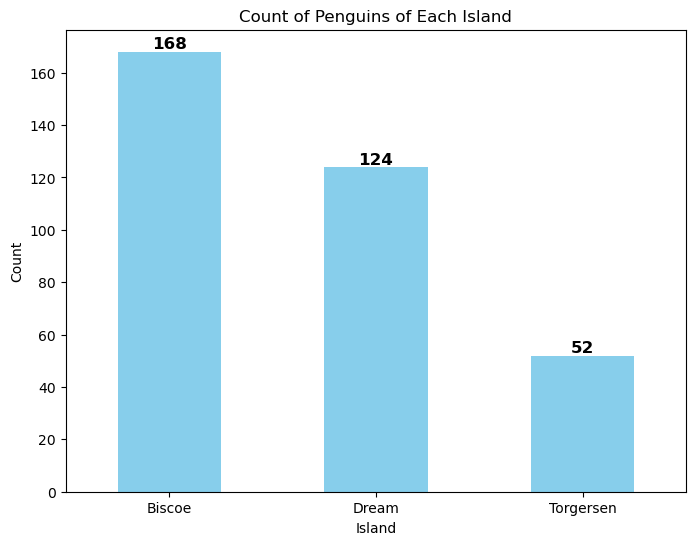

In [54]:
# Name the count of islands
island_count = df['island'].value_counts()
# Set the figure size (width, height)(in text citation figure size)
plt.figure(figsize=(8, 6))
# Plot the bar chart (Matplot in text citation)
bars = island_count.plot(kind='bar',color='skyblue')

# Add data labels (counts) on top of each bar (in text citation value label)
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.0f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 color='black', fontsize=12, fontweight='bold')

# Add titles and labels to the bar chart (in text citation title and label)
plt.title('Count of Penguins of Each Island')
plt.xlabel('Island')
plt.ylabel('Count')

# Display the plot
# Rotate the x-axis labels for better visibility (rotation in text citation)
plt.xticks(rotation=0)

From this bar chart, it is clear that the majority of the penguins that the data was collected from, were located in Biscoe island, which accounts for approximatelly 50% of all penguins. 
Only 1 in every 7 penguins from this dataset were from the Torgersen island.
From this chart some conclusions can be drawn:
- The variation in sample size from each island can influence further analysis and interpretation of the dataset (Sample Size variation in text citation). For instance, Biscoe island has the largest sample size and might provide more robust insigths of the penguins from that island than penguins from Torgersen.
- Further analysis can be conducted to verify the species distribution within each island's dataset to ensure species composition is representative and does not skew the analysis (Correlation between two categorical variables). This is to confirm that no island hosts a predominant species which might affect the generalization about species physical characteristics.

## Summary Statistics

For the continuous numerical data, descriptive statistics is used to get a summary and initial insights into the data (Calculate Statistics, What is descriptive statistics). 

In [ ]:
# Describe the data set.
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


The descriptive statistics reveal average measurements (mean) and their variability (standard deviation), highlighting significant diversity among penguins. Most penguins have bill lengths between 39.2 mm and 48.5 mm, bill depths between 15.6 mm and 18.7 mm, flipper lengths between 190.0 mm and 213.0 mm, and body masses ranging from 2,700.0 grams to 6,300.0 grams. Penguins body masses exhibits the highest variation (801.96 grams). These statistics provide key insights into the distribution and typical ranges of these attributes within the dataset.

## Continuous Numerical Data and Histogram

Histograms are valuable for exploring and interpreting continuous numerical data due to their ability to reveal distributional patterns, identify outliers, and facilitate comparisons of data quantity within different bins according to Pannell, 2023. 
From the four variables of data type categorical numerical described above, bill_depth_mm shows the best distribution as its data seems to be relatively symmetric and less variable distribution compared to the others. Variables that the data are normal distributed has symmetry around the mean, which facilitates easier interpretation of the statistical results and application of several statistical techniques (Halder, 2024). In addition, variables with a normal distribution can be advantageous when analyzing their correlation with other variables as normality implies that the data points are symmetrically distributed around the mean, which often corresponds to a linear relationship between variables (Kenton, 2024 and Turney). Therefore for this analysis a histogram of the bill_depth_mm is generated.

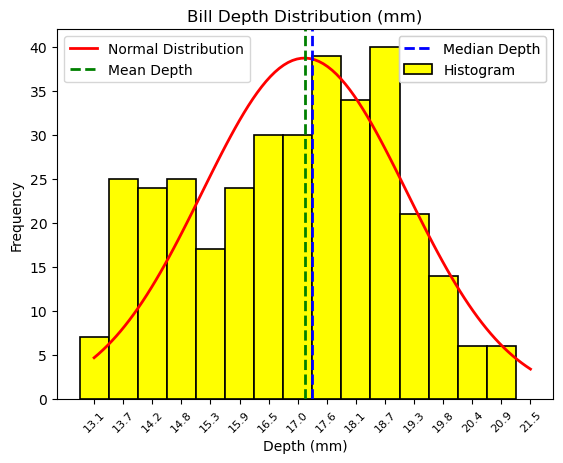

In [113]:
# Assuming 'df' is your DataFrame containing the data
data = df['bill_depth_mm'].dropna()

# Calculate histogram with specified number of bins
num_bins = 15
counts, bin_edges = np.histogram(data, bins=num_bins)

# Plot histogram using plt.bar() with bin edges and counts
plt.bar(bin_edges[:-1], counts, width=np.diff(bin_edges), color='yellow', edgecolor='black', linewidth=1.2, label='Histogram')

# Add title and labels
plt.title("Bill Depth Distribution (mm)")
plt.xlabel("Depth (mm)")
plt.ylabel("Frequency")

# Calculate positions for tick labels at bin edges
tick_positions = bin_edges  # Use bin edges as tick positions

# Set custom x-axis tick positions and labels
plt.xticks(tick_positions, labels=[f"{bin_edge:.1f}" for bin_edge in bin_edges], rotation=45, fontsize=8)

# Fit a normal distribution to the data
mu, std = norm.fit(data)  # Estimate mean (mu) and standard deviation (std) of the data

# Generate x values for the normal distribution curve
x = np.linspace(min(data), max(data), 100)
pdf = norm.pdf(x, mu, std)  # Calculate the probability density function (PDF) for the normal distribution

# Plot the normal distribution curve (bell-shaped line)
plt.plot(x, pdf * len(data) * np.diff(bin_edges)[0], 'r-', linewidth=2, label='Normal Distribution')

# Calculate the mean and median of the data
mean_depth = np.mean(data)
median_depth = np.median(data)

# Add vertical lines at the mean and median values
plt.axvline(mean_depth, color='green', linestyle='dashed', linewidth=2, label='Mean Depth')
plt.axvline(median_depth, color='blue', linestyle='dashed', linewidth=2, label='Median Depth')

# Create legend handles and labels for different groups of legends
handles, labels = plt.gca().get_legend_handles_labels()

# Create legend for left side (Histogram and Normal Distribution)
left_legend = plt.legend(handles[:2], labels[:2], loc='upper left')

# Create legend for right side (Mean Depth and Median Depth)
right_legend = plt.legend(handles[2:], labels[2:], loc='upper right')

# Add both legends to the plot
plt.gca().add_artist(left_legend)
plt.gca().add_artist(right_legend)


This histrogram displays a symmetric distribution (bell-shaped). From the Summary Statistics section it was observed that the value for the mean is 17.15 mm. The median can be seen in the histogram intersecting the bin value of 17.30 mm. The median and mean values are very close to each other which confirms the symmetric distribution (in text citation Normal Distribution).
Though this histrogram follows a normal distribution, it is possible to observe a small deformation on the left side of the graphic between the second and forth bin, and slightly to the right of the center of the histogram on the 11th bin. This might be due to the nature of the dataset that accounts for penguins of different species, islands, sex and sizes. Further investigation needs to be carried out analysing the correlation of the bill depth of the penguins with the other variables of this dataset (in text citation Tableau).


References:

https://www.nvidia.com/en-us/glossary/pandas-python/#:~:text=Benefits%20of%20Pandas&text=Easy%20handling%20of%20missing%20data,DataFrames%20and%20higher%2Ddimensional%20objects 

https://github.com/mwaskom/seaborn/blob/master/README.md

https://ianmcloughlin.github.io/2324_principles_of_data_analytics/

https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/

https://realpython.com/pandas-python-explore-dataset/

https://uniskills.library.curtin.edu.au/numeracy/statistics/data-variable-types/

https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html

https://www.simplilearn.com/what-is-descriptive-statistics-article

https://stackoverflow.com/questions/55394854/how-to-change-the-format-of-describe-output

https://venngage.com/blog/bar-charts-vs-histograms/#:~:text=Although%20histograms%20and%20bar%20charts,of%20variables%20in%20a%20dataset

https://web.stanford.edu/group/stanfordbirds/text/essays/Species_and_Speciation.html#:~:text=Geographic%20variation%20%2D%2D%20birds%20showing,natural%20selection%20in%20different%20habitats

https://www.freecodecamp.org/news/matplotlib-figure-size-change-plot-size-in-python/

https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm

https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/

https://www.w3schools.com/python/matplotlib_labels.asp

https://www.pythoncharts.com/matplotlib/rotating-axis-labels/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4296634/

https://datascientest.com/en/calculate-correlation-between-two-variables-how-do-you-measure-dependence#:~:text=Correlation%20between%20two%20categorical%20variables%20%3A&text=It%20consists%20of%20rejecting%20or,variables%20being%20tested%20are%20independent”

https://leanscape.io/histogram-a-comprehensive-guide/

https://medium.com/@HalderNilimesh/exploring-normal-distribution-statistical-analysis-and-data-interpretation-c3bbd4be446d

https://www.investopedia.com/terms/a/anova.asp

https://www.scribbr.com/statistics/pearson-correlation-coefficient/

https://dietassessmentprimer.cancer.gov/learn/distribution.html#:~:text=A%20variable%20that%20is%20normally,to%20describe%20departures%20from%20normality

https://www.tableau.com/data-insights/reference-library/visual-analytics/charts/histograms#:~:text=A%20histogram%20tracks%20the%20different,bar%20as%20bins%20or%20classes



***
### End